In [1]:
import warnings 
warnings.filterwarnings('ignore') 
import pandas as pd
pd.set_option('max_columns', 150)
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
sns.set_style("whitegrid")

%matplotlib inline

# data preperation:
1. Remove the first row and the last two rows, as it's irrelevant.
2. Remove all columns with more than 50% missing values, allowing us to work faster

In [2]:
Q1 = pd.read_csv('LoanStats_2016Q1.csv',skiprows = 1)
Q1 = Q1.iloc[:-2]

Q2 = pd.read_csv('LoanStats_2016Q2.csv',skiprows = 1)
Q2 = Q2.iloc[:-2]

Q3 = pd.read_csv('LoanStats_2016Q3.csv',skiprows = 1)
Q3 = Q3.iloc[:-2]

Q4 = pd.read_csv('LoanStats_2016Q4.csv',skiprows = 1)
Q4 = Q4.iloc[:-2]

In [3]:
LC = pd.concat([Q1, Q2, Q3, Q4])

<AxesSubplot:xlabel='term,grade'>

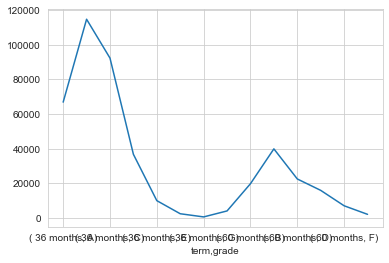

In [4]:
LC.groupby(['term','grade']).count()['loan_amnt'].plot()

In [5]:
LC.shape

(434407, 145)

In [6]:
half_count = len(LC) / 2

LC = LC.dropna(thresh=half_count,axis=1) # Drop any column with more than 50% missing values

LC.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_act_il,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_inq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,hardship_flag,disbursement_method,debt_settlement_flag
0,16000.0,16000.0,16000.0,36 months,5.32%,481.84,A,A1,Security specialist,8 years,RENT,105000.0,Not Verified,Mar-2016,Fully Paid,n,debt_consolidation,Debt consolidation,206xx,MD,15.02,1.0,Nov-2000,0.0,9.0,9.0,0.0,6219.0,27.9%,21.0,w,0.00,0.00,16098.340000,16098.34,16000.00,98.34,0.00,0.0,0.0,May-2016,16107.80,NaN,Nov-2016,0.0,1.0,Individual,0.0,0.0,23525.0,0.0,3.0,2.0,2.0,8.0,17306.0,69.0,0.0,1.0,3770.0,50.0,22300.0,1.0,3.0,1.0,3.0,3361.0,13632.0,29.7,0.0,0.0,124.0,184.0,22.0,8.0,0.0,52.0,8.0,0.0,2.0,3.0,2.0,5.0,7.0,6.0,14.0,3.0,9.0,0.0,0.0,0.0,2.0,95.2,0.0,0.0,0.0,47543.0,23525.0,19400.0,25243.0,N,Cash,N
1,17000.0,17000.0,17000.0,36 months,9.75%,546.55,B,B3,Kindergarten Teacher,< 1 year,MORTGAGE,40000.0,Verified,Mar-2016,Current,n,credit_card,Credit card refinancing,440xx,NC,24.30,0.0,Aug-2006,0.0,NaN,4.0,0.0,14009.0,85.9%,8.0,w,1856.98,1856.98,16630.580000,16630.58,15143.02,1487.56,0.00,0.0,0.0,Nov-2017,546.55,Dec-2017,Nov-2017,0.0,1.0,Individual,0.0,0.0,31939.0,0.0,1.0,0.0,0.0,25.0,17930.0,64.0,0.0,0.0,4913.0,72.0,16300.0,1.0,0.0,1.0,0.0,7985.0,2291.0,85.9,0.0,0.0,25.0,115.0,35.0,25.0,0.0,35.0,6.0,0.0,3.0,3.0,3.0,5.0,1.0,3.0,7.0,3.0,4.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,44131.0,31939.0,16300.0,27831.0,N,Cash,N
2,15000.0,15000.0,15000.0,60 months,15.31%,359.30,C,C5,Branch Manager,10+ years,MORTGAGE,70000.0,Source Verified,Mar-2016,Fully Paid,n,home_improvement,Home improvement,750xx,TX,9.99,0.0,Jan-2002,0.0,32.0,6.0,0.0,11630.0,48.5%,22.0,w,0.00,0.00,17155.045652,17155.05,15000.00,2137.08,17.97,0.0,0.0,Apr-2017,13106.47,NaN,Mar-2017,0.0,1.0,Individual,0.0,0.0,27322.0,0.0,1.0,1.0,1.0,12.0,15692.0,72.0,1.0,2.0,5840.0,60.0,24000.0,3.0,0.0,6.0,3.0,4554.0,9808.0,38.7,0.0,0.0,160.0,152.0,9.0,9.0,3.0,9.0,8.0,0.0,2.0,4.0,3.0,6.0,7.0,5.0,12.0,4.0,6.0,0.0,0.0,0.0,2.0,95.5,33.3,0.0,0.0,45706.0,27322.0,16000.0,21706.0,N,Cash,N
3,2425.0,2425.0,2425.0,36 months,15.31%,84.44,C,C5,Teacher,5 years,MORTGAGE,25000.0,Source Verified,Mar-2016,Fully Paid,n,credit_card,Credit card refinancing,296xx,SC,38.50,0.0,Sep-2007,0.0,NaN,7.0,0.0,10604.0,84.8%,15.0,w,0.00,0.00,2653.180000,2653.18,2425.00,228.18,0.00,0.0,0.0,Dec-2016,2062.67,NaN,Nov-2017,0.0,1.0,Individual,0.0,0.0,97019.0,0.0,4.0,0.0,1.0,24.0,15963.0,65.0,0.0,0.0,7288.0,72.0,12500.0,0.0,0.0,0.0,1.0,13860.0,12.0,99.8,0.0,0.0,102.0,97.0,27.0,24.0,2.0,27.0,NaN,0.0,1.0,2.0,1.0,3.0,5.0,2.0,8.0,2.0,7.0,0.0,0.0,0.0,0.0,100.0,100.0,0.0,0.0,115022.0,26567.0,7300.0,24550.0,N,Cash,N
4,29900.0,29900.0,29900.0,36 months,12.99%,1007.31,C,C2,Executive Chef,10+ years,MORTGAGE,68000.

In [7]:
LC['issue_d'] = pd.to_datetime(LC['issue_d'])
LC['issue_m'] = LC['issue_d'].dt.month

In [8]:
LC[LC['loan_status'] == 'Charged Off']['loan_status'].count() / LC['loan_status'].count()

0.0710025390935229

In [9]:
LC[['loan_status','loan_amnt']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 434407 entries, 0 to 103545
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   loan_status  434407 non-null  object 
 1   loan_amnt    434407 non-null  float64
dtypes: float64(1), object(1)
memory usage: 9.9+ MB


In [10]:
LC[LC['loan_status'] == 'Charged Off'].groupby(by = 'issue_m')['loan_status'].count() / LC.groupby(by = 'issue_m')['loan_status'].count()

issue_m
1     0.102608
2     0.097144
3     0.094883
4     0.089262
5     0.083970
6     0.071747
7     0.070325
8     0.061825
9     0.053582
10    0.039943
11    0.034489
12    0.030456
Name: loan_status, dtype: float64

In [11]:
LC[LC['loan_status'] == 'Charged Off'].groupby(by = 'issue_m')['loan_status'].count()

issue_m
1     3321
2     3840
3     5882
4     3252
5     2385
6     2369
7     2440
8     2243
9     1508
10    1309
11    1193
12    1102
Name: loan_status, dtype: int64

In [12]:
LC["loan_status"].unique()

array(['Fully Paid', 'Current', 'Late (31-120 days)', 'Charged Off',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

# Loan Amount

Text(0.5, 1.0, 'Total committed by Investors')

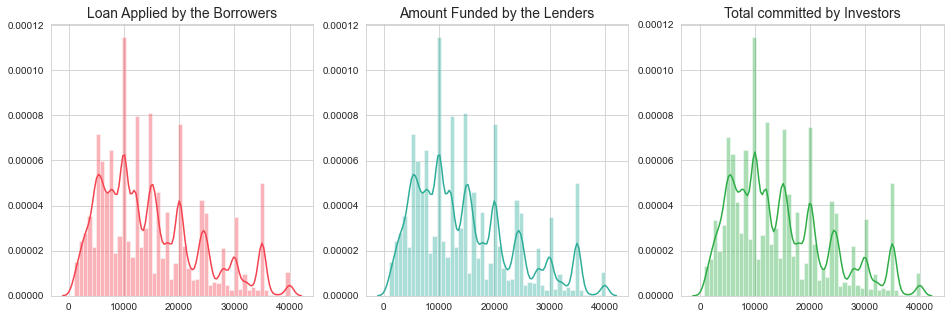

In [14]:
fig, ax = plt.subplots(1, 3, figsize=(16,5))

loan_amount =LC["loan_amnt"].values
funded_amount = LC["funded_amnt"].values
investor_funds = LC["funded_amnt_inv"].values

sns.distplot(loan_amount, ax=ax[0], color="#F4424F")
ax[0].set_title("Loan Applied by the Borrowers", fontsize=14)
sns.distplot(funded_amount, ax=ax[1], color="#2EAD99")
ax[1].set_title("Amount Funded by the Lenders", fontsize=14)
sns.distplot(investor_funds, ax=ax[2], color="#2EAD46")
ax[2].set_title("Total committed by Investors", fontsize=14)

### Insights:
1.Most of the loans issued were in the range of 10k and 20k. <br>
2.The loans applied by borrowers and the amount issued to the borrowers have a similar distribution, which indicates that most likely qulified borrowers would get the same loan amount as they had applied for. 


Text(0, 0.5, 'Total Loan Applied by the Borrowers')

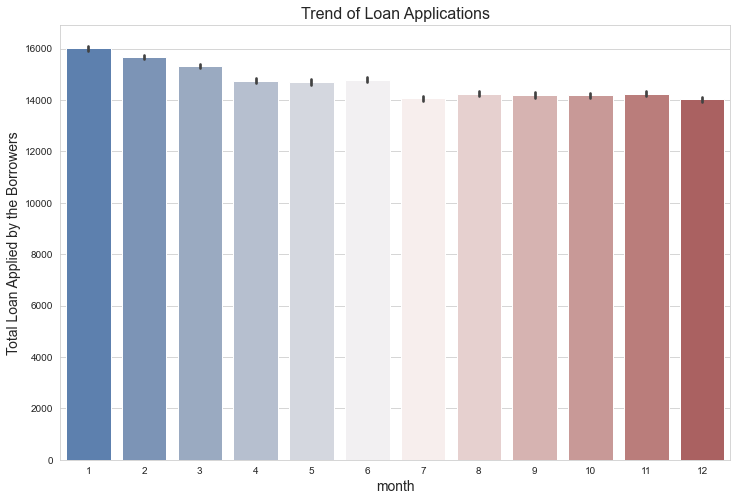

In [15]:
issue_dt = pd.to_datetime(LC['issue_d'])
LC['month'] = issue_dt.dt.month

plt.figure(figsize=(12,8))
sns.barplot('month', 'loan_amnt', data=LC, palette="vlag")
plt.title('Trend of Loan Applications', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('Total Loan Applied by the Borrowers', fontsize=14)



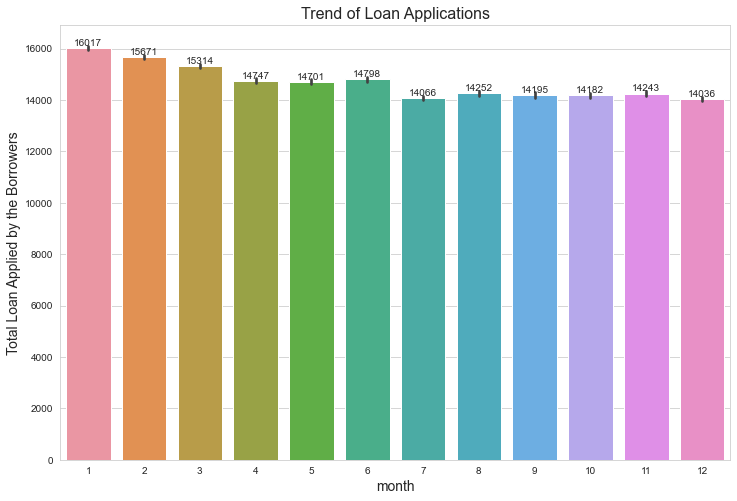

In [16]:
# plot vertical barplot
#sns.set(rc={‘figure.figsize’:(10,5)})
plt.figure(figsize=(12,8))
ax = sns.barplot('month','loan_amnt', data=LC)

plt.title('Trend of Loan Applications', fontsize=16)
plt.xlabel('month', fontsize=14)
plt.ylabel('Total Loan Applied by the Borrowers', fontsize=14)


# label each bar in barplot

for p in ax.patches:
 # get the height of each bar
 height = p.get_height()
 # adding text to each bar
 ax.text(x = p.get_x()+(p.get_width()/2), # x-coordinate position of data label, padded to be in the middle of the bar
         y = height+100, # y-coordinate position of data label, padded 100 above bar
         s = '{:.0f}'.format(height), # data label, formatted to ignore decimals
         ha = 'center') # sets horizontal alignment (ha) to center

### Insights:
1.January was the month with most loans applied. <br>
2.There's a decrease trend in the total applied loan amount.

# Good Loans vs Bad Loans

In [17]:
LC["loan_status"].value_counts()

Current               287697
Fully Paid             96694
Charged Off            30844
Late (31-120 days)     11219
In Grace Period         5909
Late (16-30 days)       2013
Default                   31
Name: loan_status, dtype: int64

In [18]:
bad_loan = ["Charged Off","Late (16-30 days)", "In Grace Period", 
            "Late (31-120 days)","Default"]

LC['loan_status_group'] = np.nan

def loan_condition(status):
    if status in bad_loan:
        return 'Bad Loan'
    else:
        return 'Good Loan'
    
    
LC['loan_status_group'] = LC['loan_status'].apply(loan_condition)

In [19]:
LC["loan_status_group"].unique()

array(['Good Loan', 'Bad Loan'], dtype=object)

[Text(0, 0.5, '(%)')]

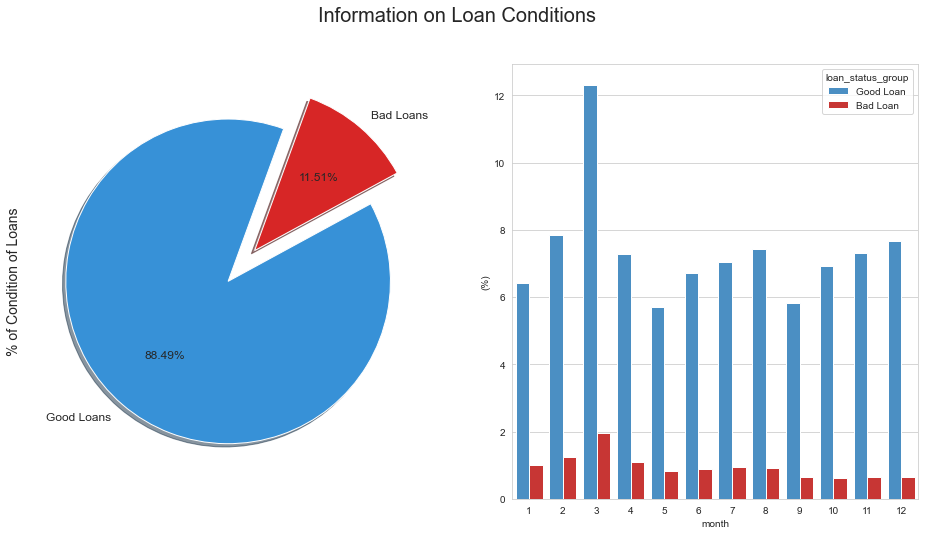

In [20]:
f, ax = plt.subplots(1,2, figsize=(16,8))

labels ="Good Loans", "Bad Loans"

plt.suptitle('Information on Loan Conditions', fontsize=20)

LC["loan_status_group"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors= ["#3791D7", "#D72626"], 
                                             labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Loans', fontsize=14)

sns.barplot(x="month", y="loan_amnt", hue="loan_status_group", data=LC, palette=["#3791D7", "#E01E1B"], estimator=lambda x: len(x) / len(LC) * 100)
ax[1].set(ylabel="(%)")

### Insights:
1.Bad loans consists 11.51% of total loans. <br>
2.Most bad loans occured in March, but March also had the highest good loans. (Need to check bad loan ratio by month) 

In [21]:
feature_filter = LC[LC["term"] ==" 36 months"]
test = feature_filter[feature_filter["loan_status_group"]=='Good Loan']
feature_filter["loan_status_group"].unique()

array(['Good Loan', 'Bad Loan'], dtype=object)

In [22]:
def plotUnivariateRatioBar(feature,my_palette, data=LC, figsize=(10,5), rsorted=True):
    
    
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status_group"]=='Bad Loan'])
        feature_values.append(feature_count/len(feature_filter["loan_status_group"])*100)
    
    data = {'y':feature_values, 
        'x':feature_dimension} 
    
    df = pd.DataFrame(data)
    
    df = df.sort_values("y",ascending=True)
    
    plt.figure(figsize=figsize)
    splot=sns.barplot(df["x"], df["y"], palette=my_palette)
    
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
                   
    plt.title("Bad Loans% by "+str(feature)+" feature", fontsize=16)
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("Bad Loans %", fontsize=16)
    plt.show()

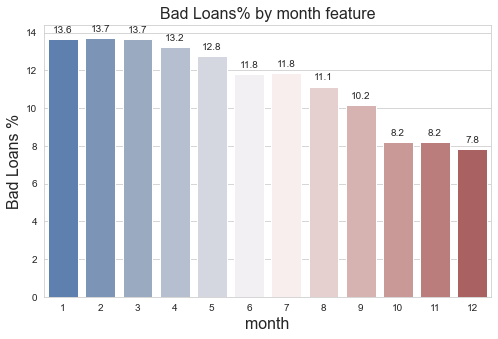

In [23]:
plotUnivariateRatioBar("month", my_palette='vlag',figsize=(8,5))

### Insights:
The bad loans rate decreased by month. January has the highest bad loans ratio. Need to look into what's changed and what's the potential cause.

(array([ 19784.,  70591., 109233., 104652.,  76346.,  42088.,   8668.,
          1893.,    561.,    141.]),
 array([-1.   ,  5.092, 11.184, 17.276, 23.368, 29.46 , 35.552, 41.644,
        47.736, 53.828, 59.92 ]),
 <BarContainer object of 10 artists>)

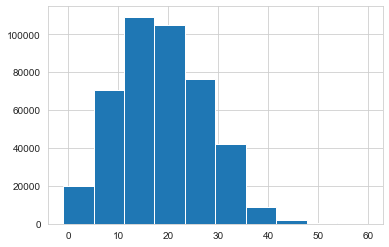

In [24]:
x = LC[LC["dti"] < 60]
plt.hist(x["dti"])

In [26]:
conditions = [
    (LC['dti'] <= 5),
    (LC['dti'] <= 10),
    (LC['dti'] <= 15),
    (LC['dti'] <= 20),
    (LC['dti'] <= 25),
    (LC['dti'] <= 30),
    (LC['dti'] <= 35),
    #(LC['dti'] <= 40),
    (LC['dti'] > 35),
    ]

values = ['0-5','5-10', '10-15','15-20', '20-25','25-30', '30-35','35+']

LC['dti range'] = np.select(conditions, values)

In [27]:
LC_dti = LC[LC["dti range"] != '0']
def plotUnivariateRatioline(feature,my_palette, data=LC_dti, figsize=(10,5), rsorted=True):
    
    
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status_group"]=='Bad Loan'])
        feature_values.append(feature_count/len(feature_filter["loan_status_group"])*100)
    
    data = {'y':feature_values, 
        'x':feature_dimension} 
    
    df = pd.DataFrame(data)
    
    df = df.sort_values("y",ascending=True)
    
    plt.figure(figsize=figsize)
    ax=sns.lineplot(df["x"], df["y"], palette=my_palette)
    
    for x, y in zip(df["x"], df["y"]):
         plt.text(x = x, # x-coordinate position of data label
                 y = y, # y-coordinate position of data label, adjusted to be 150 below the data point
                 s = '{:.2f}'.format(y) # data label, formatted to ignore decimals
                 ) 
                   
    plt.title("Bad Loans% by "+str(feature)+" feature", fontsize=16)
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("Bad Loans %", fontsize=16)
    plt.show()

In [28]:
LC_dti['dti range'].unique() 

array(['15-20', '20-25', '5-10', '35+', '25-30', '10-15', '0-5', '30-35'],
      dtype=object)

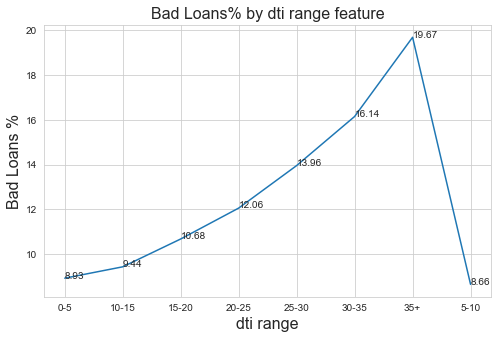

In [29]:
plotUnivariateRatioline("dti range", my_palette='tab10', figsize=(8,5))

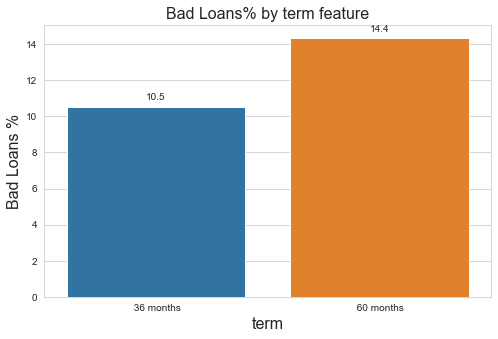

In [30]:
plotUnivariateRatioBar("term", my_palette='tab10', figsize=(8,5))

### Insights:
Bad loans rate increased with respect to term. The chances of loan becoming a bad loan is less for 36 months than 60 months. 

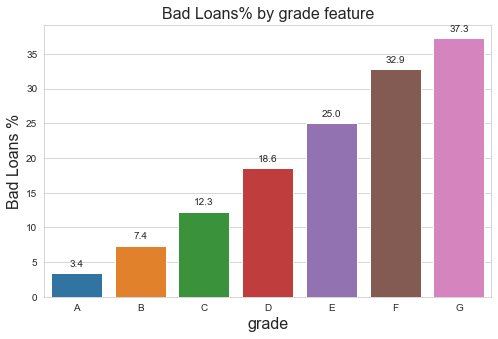

In [32]:
plotUnivariateRatioBar("grade", my_palette='tab10', figsize=(8,5))

### Insights:
The bad loans rate is increasing with respect to loan grade, hence the changes of bad loans increases with the grade from A moving towards G.

In [33]:
conditions = [
    (LC['loan_amnt'] <= 5000),
    (LC['loan_amnt'] <= 10000),
    (LC['loan_amnt'] <= 15000),
    (LC['loan_amnt'] <= 20000),
    (LC['loan_amnt'] <= 25000),
    (LC['loan_amnt'] > 25000)
    ]

values = ['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000', '25000+']

LC['loan_amnt_group'] = np.select(conditions, values)

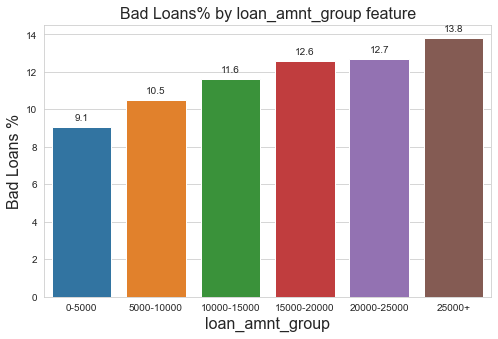

In [34]:
plotUnivariateRatioBar("loan_amnt_group", my_palette='tab10', figsize=(8,5))

### Insights:
The bad loans rate increased with respect to loan amount. Borrowers with higher loan amount have higher risk of defualting. 

In [35]:
conditions = [
    (LC['annual_inc'] <= 25000),
    (LC['annual_inc'] <= 50000),
    (LC['annual_inc'] <= 75000),
    (LC['annual_inc'] <= 100000),
    (LC['annual_inc'] >  100000)
    ]

values = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000+']

LC['annual_inc_range'] = np.select(conditions, values)

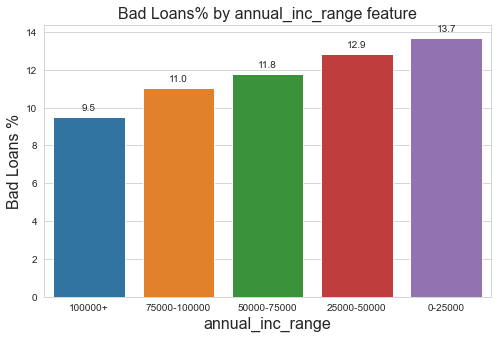

In [36]:
plotUnivariateRatioBar("annual_inc_range", my_palette='tab10', figsize=(8,5))

### Insights:
Bad loans rate increased as borrower's annual income decreased. Borrowers with lower annual income have higher risk of defaulting. 

In [37]:
LC['int_rate_float']= list(map(lambda x: float(x.strip('%'))/100,LC['int_rate']))

In [38]:
conditions = [
    (LC['int_rate_float'] <= 0.075),
    (LC['int_rate_float'] <= 0.10),
    (LC['int_rate_float'] <= 0.125),
    (LC['int_rate_float'] <= 0.15),
    (LC['int_rate_float'] > 0.15)
    ]

values = ['0-7.5', '7.5-10', '10-12.5', '12.5-15', '15+']

LC['int_rate_range'] = np.select(conditions, values)

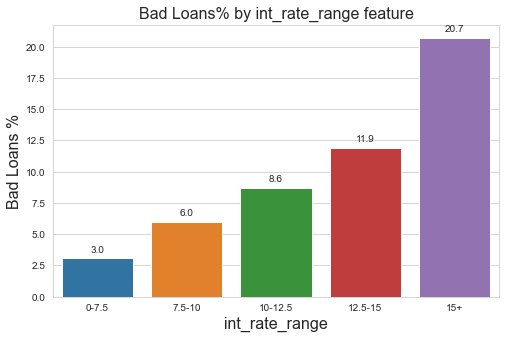

In [39]:
plotUnivariateRatioBar("int_rate_range", my_palette='tab10', figsize=(8,5))

### Insights:
The bad loans rate increases with interest rate. Bad loans often happens for loans with high interest. 

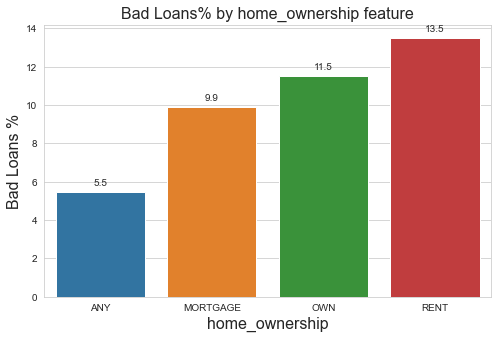

In [41]:
plotUnivariateRatioBar("home_ownership", my_palette='tab10', figsize=(8,5))

### Insights:
Bad loans variates by home ownership. Borrowers who rent have higher risk of defaulting than home owners. 

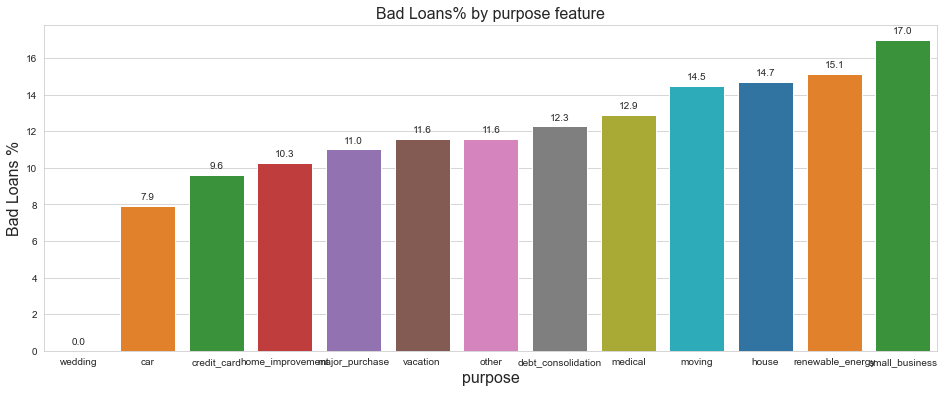

In [42]:
plotUnivariateRatioBar("purpose", my_palette='tab10', figsize=(16,6))

### Insights:
Bad loans rate variates by purpose type. 'Small business' has the highest rate, indicating small business loan is more likely to become a bad loan comparing to other purpose type. Additionally, loans with purpose type 'hosue', 'Moving', 'renewable_enery' also have higher chance to become bad loans.

In [43]:
### Removing Nulls in emp_length
LC["emp_length"].unique()

array(['8 years', '< 1 year', '10+ years', '5 years', '6 years',
       '4 years', '9 years', '2 years', '7 years', '1 year', nan,
       '3 years'], dtype=object)

In [44]:
LC_emp = LC[["emp_length","loan_status_group"]].dropna(axis=0) 

In [45]:
LC_emp["emp_length"].unique()

array(['8 years', '< 1 year', '10+ years', '5 years', '6 years',
       '4 years', '9 years', '2 years', '7 years', '1 year', '3 years'],
      dtype=object)

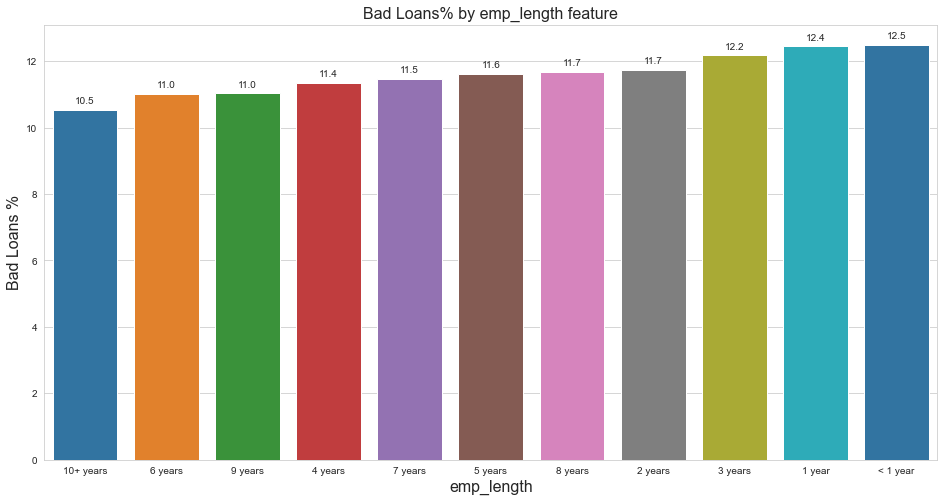

In [46]:
def plotUnivariateRatioBar(feature,my_palette, data=LC_emp, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status_group"]=='Bad Loan'])
        feature_values.append(feature_count/len(feature_filter["loan_status_group"])*100)
    
    data = {'y':feature_values, 
        'x':feature_dimension} 
    
    df = pd.DataFrame(data)
    
    df = df.sort_values("y",ascending=True)
    
    #plt.figure(figsize=(12,8))
    splot = sns.barplot(df["x"], df["y"], palette=my_palette)
    
    for p in splot.patches:
        splot.annotate(format(p.get_height(), '.1f'), 
                       (p.get_x() + p.get_width() / 2., p.get_height()), 
                       ha = 'center', va = 'center', 
                       xytext = (0, 9), 
                       textcoords = 'offset points')
        
    plt.title("Bad Loans% by "+str(feature)+" feature", fontsize=16)
    plt.xlabel(feature, fontsize=16)
    plt.ylabel("Bad Loans %", fontsize=16)
    plt.show()

plotUnivariateRatioBar("emp_length", my_palette='tab10', figsize=(16,8))

### Insights:
The bad loans rate is constant here, hence bad loans does not variate by employment length. 

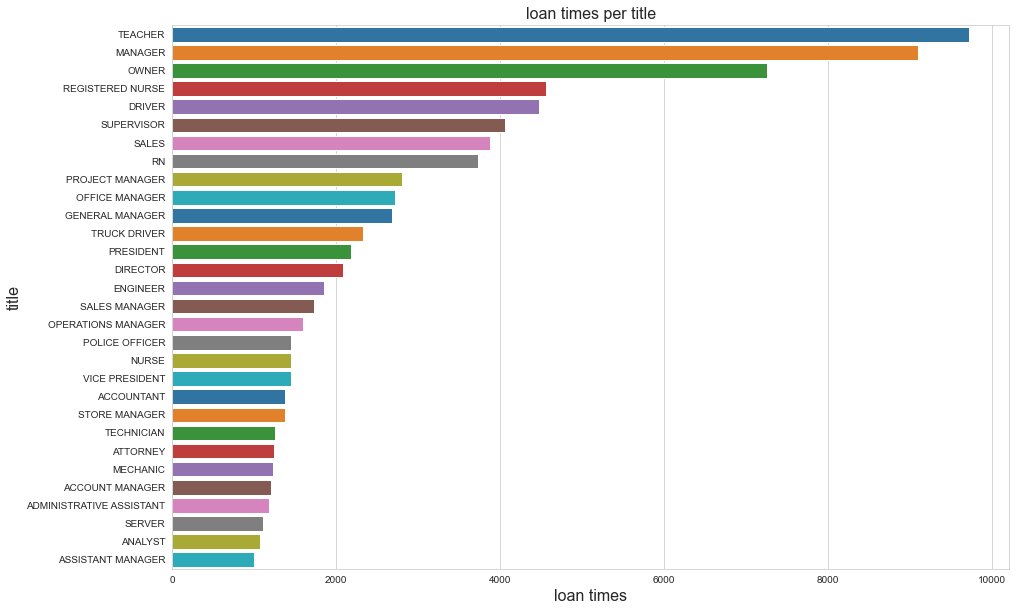

In [47]:
# histogram of the top 30 profession of loan figures
LC["emp_title"] = LC["emp_title"].apply(lambda x: str(x).upper())
LC_title = LC[LC["emp_title"] != 'NAN']["emp_title"] 

loan_times_title = LC_title.value_counts().to_dict()
loan_times_title_pd = pd.DataFrame(list(loan_times_title.items()), columns=["title", "loan_times"])
loan_times_title_pd_30 = loan_times_title_pd[0:30]

sns.set_style("whitegrid")
f_loan_times_per_title, ax_loan_times_per_title = plt.subplots(figsize=(15, 10))

sns.barplot(loan_times_title_pd_30["loan_times"], loan_times_title_pd_30["title"], ax=ax_loan_times_per_title,
            palette="tab10")
        
ax_loan_times_per_title.set_title("loan times per title", fontsize=16)
ax_loan_times_per_title.set_xlabel("loan times", fontsize=16)
ax_loan_times_per_title.set_ylabel("title", fontsize=16)
plt.show()
plt.close()

###Insights:


In [49]:
loan_times_title_pd_30["title"].unique()

array(['TEACHER', 'MANAGER', 'OWNER', 'REGISTERED NURSE', 'DRIVER',
       'SUPERVISOR', 'SALES', 'RN', 'PROJECT MANAGER', 'OFFICE MANAGER',
       'GENERAL MANAGER', 'TRUCK DRIVER', 'PRESIDENT', 'DIRECTOR',
       'ENGINEER', 'SALES MANAGER', 'OPERATIONS MANAGER',
       'POLICE OFFICER', 'NURSE', 'VICE PRESIDENT', 'ACCOUNTANT',
       'STORE MANAGER', 'TECHNICIAN', 'ATTORNEY', 'MECHANIC',
       'ACCOUNT MANAGER', 'ADMINISTRATIVE ASSISTANT', 'SERVER', 'ANALYST',
       'ASSISTANT MANAGER'], dtype=object)

In [50]:
LC_title = LC[LC["emp_title"].isin(loan_times_title_pd_30["title"].unique())]

In [51]:
LC_title["title"].unique()

array(['Credit card refinancing', 'Debt consolidation',
       'Moving and relocation', nan, 'Other', 'Home improvement',
       'Medical expenses', 'Vacation', 'Major purchase', 'Car financing',
       'Business', 'Green loan', 'Home buying'], dtype=object)

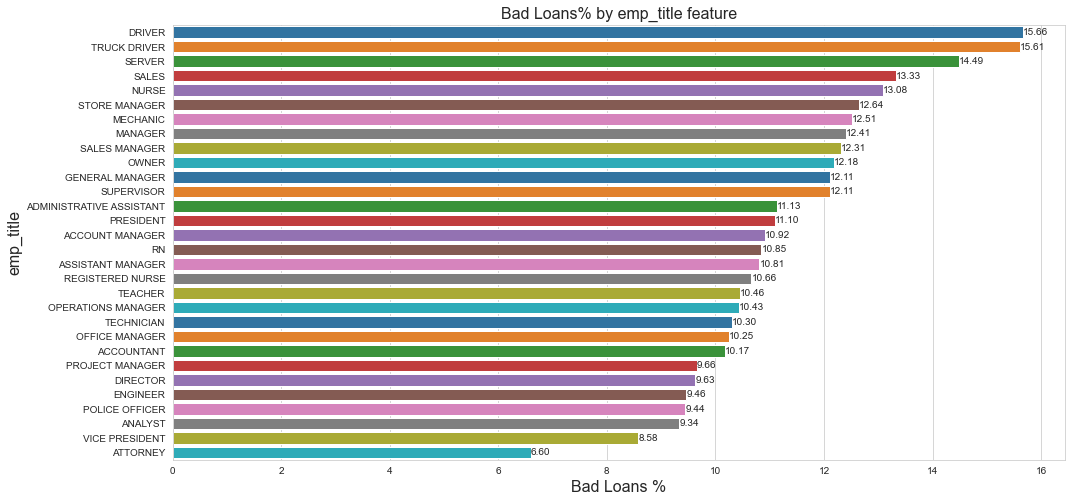

In [52]:
 def plotUnivariateRatioBar(feature,my_palette, data=LC_title, figsize=(10,5), rsorted=True):
    plt.figure(figsize=figsize)
    
    if rsorted:
        feature_dimension = sorted(data[feature].unique())
    else:
        feature_dimension = data[feature].unique()
    
    feature_values = []
    for fd in feature_dimension:
        feature_filter = data[data[feature]==fd]
        feature_count = len(feature_filter[feature_filter["loan_status_group"]=='Bad Loan'])
        feature_values.append(feature_count/len(feature_filter["loan_status_group"])*100)
    
    data = {'Bad Load rate':feature_values, 
        'emp title':feature_dimension} 
    
    df = pd.DataFrame(data)
    
    df = df.sort_values("Bad Load rate",ascending=False)
    
    #plt.figure(figsize=(12,8))
    ax = sns.barplot(df["Bad Load rate"],df["emp title"],  palette=my_palette)
    
    for p in ax.patches:
         height = p.get_height() # height of each horizontal bar is the same
         width = p.get_width() # width (average number of passengers)
         # adding text to each bar
         ax.text(x = width, # x-coordinate position of data label, padded 3 to right of bar
                 y = p.get_y()+(height/2), # # y-coordinate position of data label, padded to be in the middle of the bar
                 s = '{:.2f}'.format(width), # data label, formatted to ignore decimals
                 va = 'center')
    
    plt.title("Bad Loans% by "+str(feature)+" feature", fontsize=16)
    plt.ylabel(feature, fontsize=16)
    plt.xlabel("Bad Loans %", fontsize=16)
    plt.show()

plotUnivariateRatioBar("emp_title", my_palette='tab10', figsize=(16,8))

### Insgihts:
Key note: Analysis is based on the top 30 popular employment titles.  (There may be other employment titles which have higher bad loans rate than driver, but becuase thoese loans sample volumes are low, therefore their bad loans rate is not statistical significant.) <br>

Bad Loans rate variates by emloyment title. Driver, server and sales are more likley to default.

# Bivariate Analysis

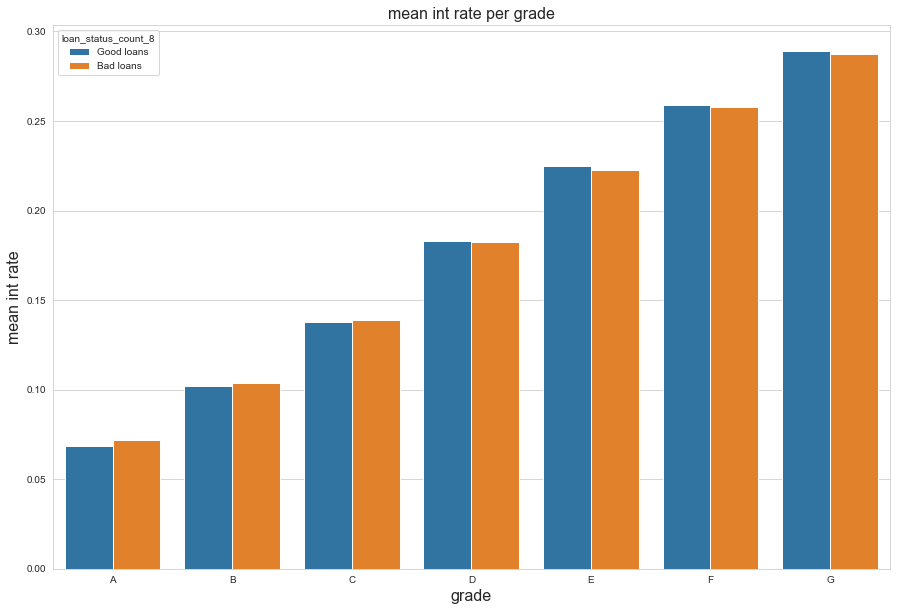

In [54]:
loan_data = LC
loan_status_dict = {"Fully Paid": 1, "Current": 1, "Charged Off": 0, "Late (31-120 days)": 0,
                    "In Grace Period": 0, "Late (16-30 days)": 0, "Default": 0}
loan_data["loan_status_count_8"] = loan_data["loan_status"].map(loan_status_dict)
loan_data["loan_status_count_8"] = loan_data["loan_status_count_8"].astype("float")
f_inc_rate_grade, ax_inc_rate_grade = plt.subplots(figsize=(15, 10))
labels = "Good loans", "Bad loans"
loan_status_dict = {1.0: "Good loans", 0.0: "Bad loans"}
loan_data["loan_status_count_8"] = loan_data["loan_status_count_8"].map(loan_status_dict)
loan_data_sorted = loan_data.sort_values(by=["grade"], inplace=False)
sns.barplot(x=loan_data_sorted["grade"], y=loan_data_sorted["int_rate_float"], hue=loan_data_sorted["loan_status_count_8"],
            hue_order=labels, ax=ax_inc_rate_grade, ci=None)
ax_inc_rate_grade.set_title("mean int rate per grade", fontsize=16)
ax_inc_rate_grade.set_xlabel("grade", fontsize=16)
ax_inc_rate_grade.set_ylabel("mean int rate", fontsize=16)
plt.show()
plt.close()
loan_data.drop(["loan_status_count_8"], axis=1, inplace=True)

In [55]:
LC["loan_status_group"].unique()

array(['Good Loan', 'Bad Loan'], dtype=object)

<AxesSubplot:xlabel='earliest_cr_line', ylabel='int_rate_float'>

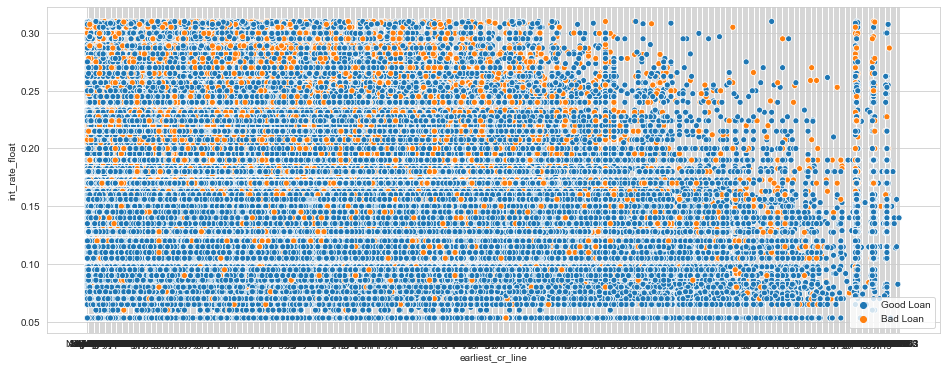

In [57]:
plt.figure(figsize=(16,6))
sns.scatterplot(data=LC, x="earliest_cr_line", y="int_rate_float", hue=LC.loan_status_group.tolist())
#ax.legend(title='Good Loan vs Bad Loan')

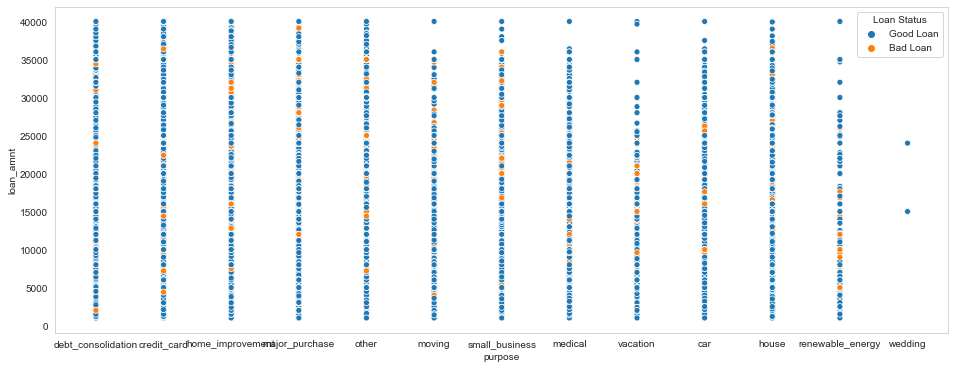

In [58]:
plt.figure(figsize=(16,6))
ax=sns.scatterplot(data=LC, x="purpose", y="loan_amnt", 
                hue=LC.loan_status_group.tolist())
ax.grid(False)
ax.legend(title='Loan Status')

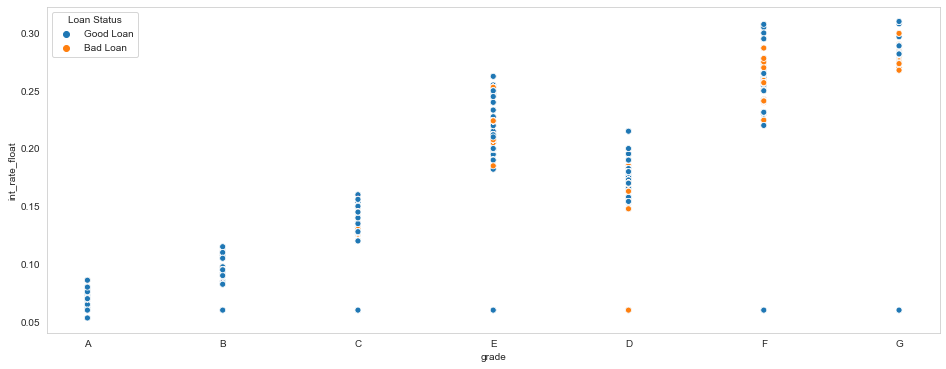

In [51]:
plt.figure(figsize=(16,6))
ax=sns.scatterplot(data=LC, x="grade", y="int_rate_float", 
                hue=LC.loan_status_group.tolist())
ax.grid(False)
ax.legend(title='Loan Status')

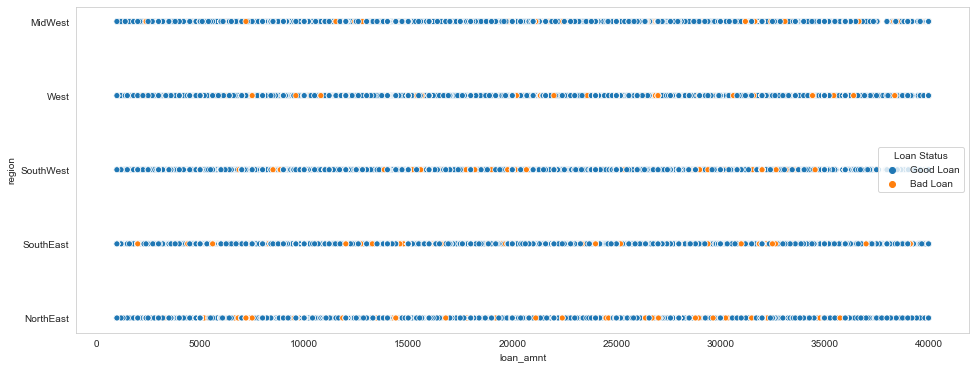

In [55]:
west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


df = LC 
df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    

df['region'] = df['addr_state'].apply(finding_regions)

plt.figure(figsize=(16,6))
ax=sns.scatterplot(data=df, x="loan_amnt", y="region", 
                hue=df.loan_status_group.tolist())
ax.grid(False)
ax.legend(title='Loan Status')

Text(0.5, 1.0, 'Loan Status by int_rate_float and purpose')

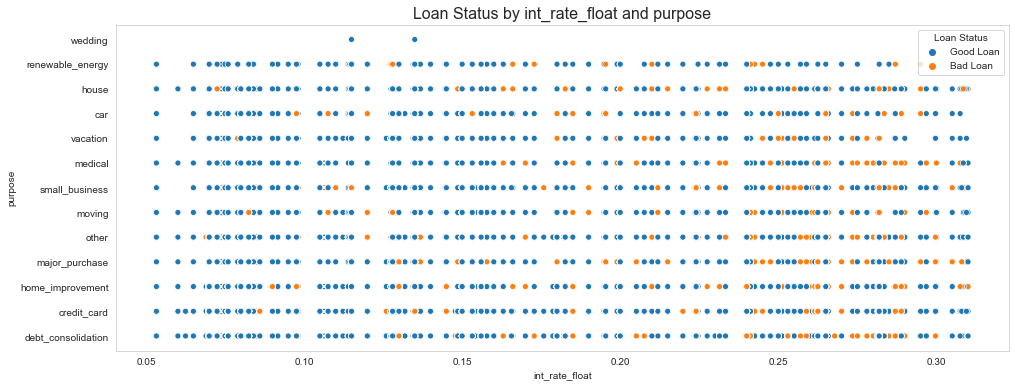

In [58]:
x_feature = "int_rate_float"
y_feature = "purpose"
plt.figure(figsize=(16,6))
ax=sns.scatterplot(data=LC, x=x_feature, y=y_feature, 
                hue=LC.loan_status_group.tolist())
ax.grid(False)
ax.legend(title='Loan Status')
plt.title("Loan Status by " + x_feature + " and " + y_feature, fontsize=16)

Text(0.5, 1.0, 'Loan Status by emp_length and home_ownership')

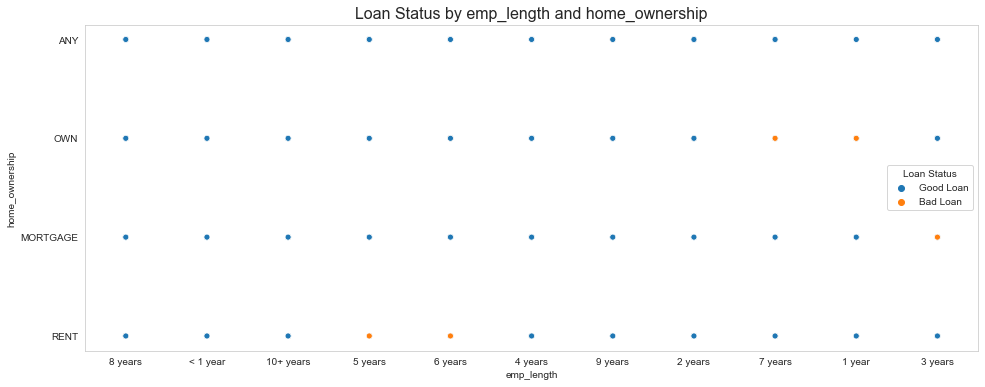

In [59]:
x_feature = "emp_length"
y_feature = "home_ownership"
plt.figure(figsize=(16,6))
ax=sns.scatterplot(data=LC, x=x_feature, y=y_feature, 
                hue=LC.loan_status_group.tolist())
ax.grid(False)
ax.legend(title='Loan Status')
plt.title("Loan Status by " + x_feature + " and " + y_feature, fontsize=16)

In [ ]:
x_feature = "int_rate_float"
y_feature = "purpose"
plt.figure(figsize=(16,6))
ax=sns.scatterplot(data=LC, x=x_feature, y=y_feature, 
                hue=LC.loan_status_group.tolist())
ax.grid(False)
ax.legend(title='Loan Status')
plt.title("Loan Status by " + x_feature + " and " + y_feature, fontsize=16)

# Exploratory Data (Catogorical)

In [160]:
def categorize(l):
    uniques = sorted(list(set(l)))
    return [uniques.index(x) + 1 for x in l]

In [163]:
df_copy = LC
df_exp = pd.DataFrame()
df_exp['annual_inc'] = df_copy['annual_inc']
df_exp['delinq_2yrs'] = df_copy['delinq_2yrs']
df_exp['dti'] = df_copy['dti']
df_exp['emp_length'] = df_copy['emp_length']
df_exp['grade'] = categorize(df_copy['grade'])
df_exp['home_ownership'] = categorize(df_copy['home_ownership'])
df_exp['installment'] = df_copy['installment']
df_exp['int_rate_float'] = df_copy['int_rate_float']
df_exp['loan_amnt'] = df_copy['loan_amnt']
df_exp['loan_status'] = categorize(df_copy['loan_status'])
df_exp['purpose'] = categorize(df_copy['purpose'])
df_exp['sub_grade'] = categorize(df_copy['sub_grade'])
df_exp['term'] = categorize(df_copy['term'])
df_exp['acc_now_delinq'] = df_copy['acc_now_delinq']

<AxesSubplot:xlabel='grade', ylabel='int_rate_float'>

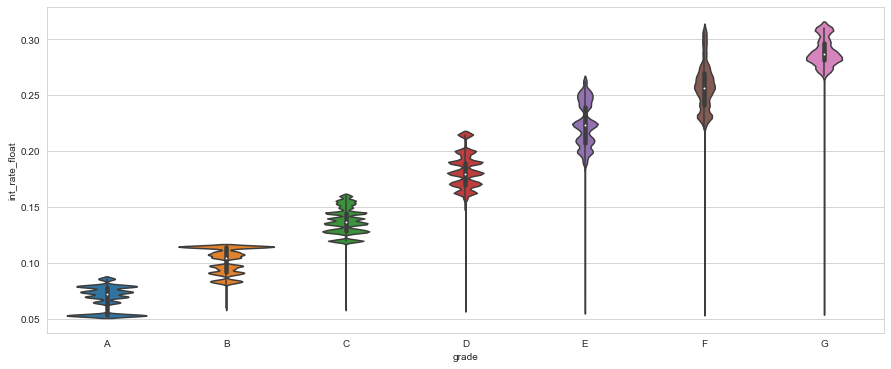

In [48]:
df_copy['int_rate_float'] = df_copy['int_rate_float']
plt.subplots(figsize=(15,6))
sns.violinplot(x="grade", y="int_rate_float", data=df_copy, order="ABCDEFG")

### insights:
Interest rate increased with respect to grade. 

## G-1 Heatmap

<AxesSubplot:>

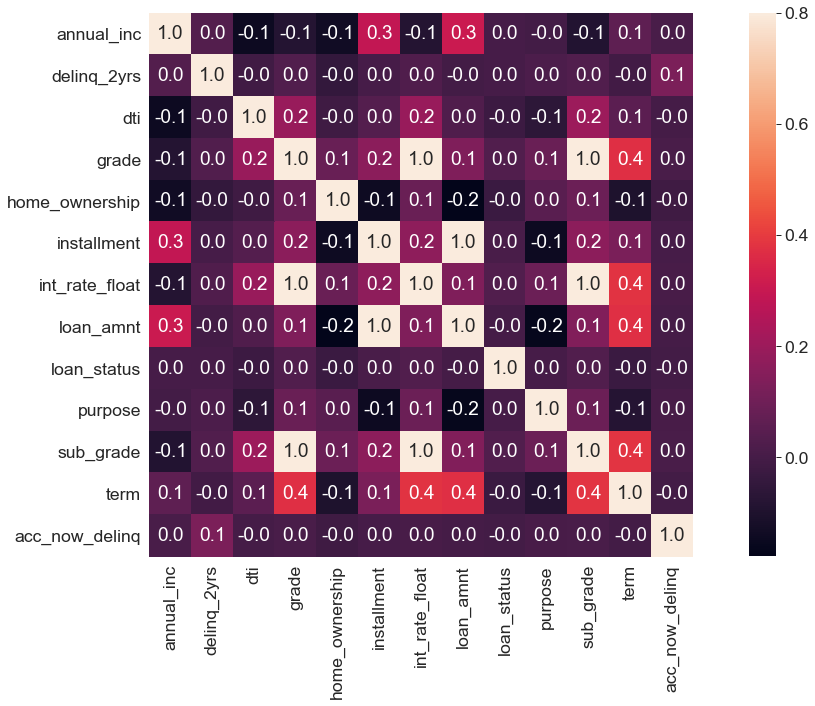

In [49]:
plt.figure(figsize=(20,10))
sns.set_context("paper", font_scale=2)
sns.heatmap(df_exp.corr(), vmax=.8, square=True, annot=True, fmt='.1f')

### Insights:
loan amount and installment seem to have high correlation.<br>
factors such as grade, sub grade, interest_rate and loan amount seem have high correlation with term.
it doesn't seem like loan_status is correlated to other factors.

## Region


In [50]:

# Make a list with each of the regions by state.

west = ['CA', 'OR', 'UT','WA', 'CO', 'NV', 'AK', 'MT', 'HI', 'WY', 'ID']
south_west = ['AZ', 'TX', 'NM', 'OK']
south_east = ['GA', 'NC', 'VA', 'FL', 'KY', 'SC', 'LA', 'AL', 'WV', 'DC', 'AR', 'DE', 'MS', 'TN' ]
mid_west = ['IL', 'MO', 'MN', 'OH', 'WI', 'KS', 'MI', 'SD', 'IA', 'NE', 'IN', 'ND']
north_east = ['CT', 'NY', 'PA', 'NJ', 'RI','MA', 'MD', 'VT', 'NH', 'ME']


df = LC 
df['region'] = np.nan

def finding_regions(state):
    if state in west:
        return 'West'
    elif state in south_west:
        return 'SouthWest'
    elif state in south_east:
        return 'SouthEast'
    elif state in mid_west:
        return 'MidWest'
    elif state in north_east:
        return 'NorthEast'
    


df['region'] = df['addr_state'].apply(finding_regions)

In [51]:
df['complete_date'] = pd.to_datetime(df['issue_d'])

group_dates = df.groupby(['complete_date', 'region'], as_index=False).sum()

group_dates['issue_d'] = [month.to_period('M') for 
                          month in group_dates['complete_date']]

group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates = group_dates.groupby(['issue_d', 'region'], as_index=False).sum()
group_dates['loan_amnt'] = group_dates['loan_amnt']/1000


df_dates = pd.DataFrame(data=group_dates[['issue_d','region','loan_amnt']])

Text(0.5, 1.0, 'Loans issued by Region')

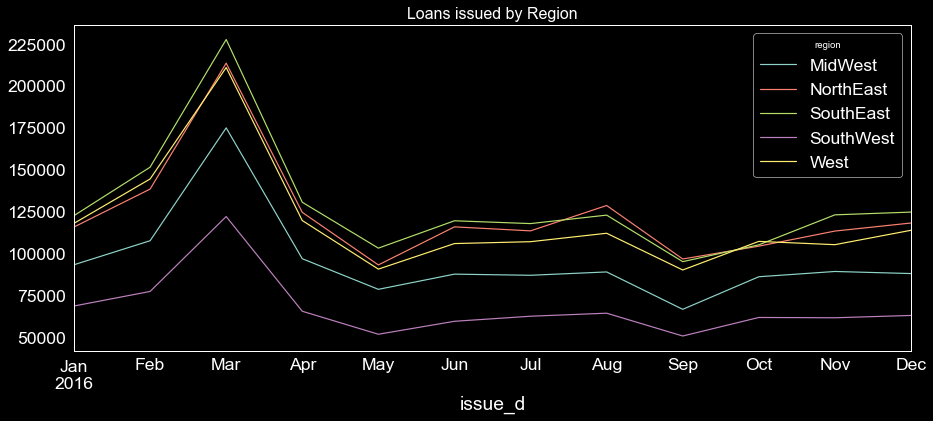

In [52]:
plt.style.use('dark_background')
cmap = plt.cm.Set3

by_issued_amount = df_dates.groupby(['issue_d', 'region']).loan_amnt.sum()
by_issued_amount.unstack().plot(stacked=False, colormap=cmap, grid=False, legend=True, figsize=(15,6))

plt.title('Loans issued by Region', fontsize=16)

In [58]:
# We have 67429 loans categorized as bad loans

badloans_df = LC

# loan_status cross
loan_status_cross = pd.crosstab(badloans_df['region'], badloans_df['loan_status']).apply(lambda x: x/x.sum() * 100)
number_of_loanstatus = pd.crosstab(badloans_df['region'], badloans_df['loan_status'])


# Round our values
loan_status_cross['Current'] = loan_status_cross['Current'].apply(lambda x: round(x, 2))
loan_status_cross['Fully Paid'] = loan_status_cross['Fully Paid'].apply(lambda x: round(x, 2))
loan_status_cross['Charged Off'] = loan_status_cross['Charged Off'].apply(lambda x: round(x, 2))
loan_status_cross['Default'] = loan_status_cross['Default'].apply(lambda x: round(x, 2))
loan_status_cross['In Grace Period'] = loan_status_cross['In Grace Period'].apply(lambda x: round(x, 2))
loan_status_cross['Late (16-30 days)'] = loan_status_cross['Late (16-30 days)'].apply(lambda x: round(x, 2))
loan_status_cross['Late (31-120 days)'] = loan_status_cross['Late (31-120 days)'].apply(lambda x: round(x, 2))


number_of_loanstatus['Total'] = number_of_loanstatus.sum(axis=1) 

# number_of_badloans
number_of_loanstatus

loan_status,Charged Off,Current,Default,Fully Paid,In Grace Period,Late (16-30 days),Late (31-120 days),Total
region,,,,,,,,
MidWest,5415,54567,4,16803,1052,345,1844,80030
NorthEast,6748,67234,8,20337,1541,500,2554,98922
SouthEast,7813,70246,10,23573,1488,500,3007,106637
SouthWest,3915,35509,2,11884,708,226,1601,53845
West,6953,60141,7,24097,1120,442,2213,94973


## G2 Statistical Testing


In [170]:
LC['grade'].unique()

array(['A', 'B', 'C', 'E', 'D', 'F', 'G'], dtype=object)

In [172]:
conditions = [
    (LC['grade'] == "A"),
    (LC['grade'] == "B"),
    (LC['grade'] == "C"),
    (LC['grade'] == "D"),
    (LC['grade'] == "E"),
    (LC['grade'] == "F"),
    (LC['grade'] == "G")
    ]

values = [1,2,3,4,5,6,7]

LC['grade_n'] = np.select(conditions, values)

In [175]:
LC['loan_status'].unique()

array(['Fully Paid', 'Current', 'Late (31-120 days)', 'Charged Off',
       'In Grace Period', 'Late (16-30 days)', 'Default'], dtype=object)

In [176]:
conditions = [
    (LC['loan_status'] == "Fully Paid"),
    (LC['loan_status'] == "Current"),
    (LC['loan_status'] == "Late (31-120 days)"),
    (LC['loan_status'] == "Charged Off"),
    (LC['loan_status'] == "In Grace Period"),
    (LC['loan_status'] == "Late (16-30 days)"),
    (LC['loan_status'] == "Default")
    ]

values = [1,1,0,0,0,0,0]

LC['loan_status_n'] = np.select(conditions, values)

In [178]:
from scipy import stats

high_grade = LC[LC["grade_n"] < 4]["loan_status_n"]
low_grade = LC[LC["grade_n"] >= 4]["loan_status_n"]
two_samples = stats.ttest_ind(high_grade, low_grade)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is 119.513 and the p-value is 0.000


In [186]:
conditions = [
    (LC['term'] == " 36 months"),
    (LC['term'] == " 60 months")
    ]

values = [1,2]

LC['term_n'] = np.select(conditions, values)

In [187]:
LC['term_n'].unique()

array([1, 2])

In [188]:
shorter_term = LC[LC["term_n"] == 1]["loan_status_n"]
longer_term = LC[LC["term_n"] == 2]["loan_status_n"]
two_samples = stats.ttest_ind(shorter_term, longer_term)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is 34.342 and the p-value is 0.000


In [190]:
low_int_rate = LC[LC["int_rate_float"] < 0.16]["loan_status_n"]
high_int_rate = LC[LC["int_rate_float"] >= 0.16]["loan_status_n"]
two_samples = stats.ttest_ind(low_int_rate, high_int_rate)
print("The t-statistic is %.3f and the p-value is %.3f" % two_samples)

The t-statistic is 118.880 and the p-value is 0.000
